#Transfer Learning with VGG

In [71]:
# for pytorch
import torchvision
import torchvision . transforms as transforms
# Define data transformations ( optional , but recommended )
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5 , 0.5 , 0.5) , (0.5 , 0.5 ,0.5))])
# Load the training dataset If data set is too large to process, you may use portion of it.
train_dataset = torchvision.datasets.CIFAR10(root ='./data ', train = True , transform = transform , download =True )
# Load the testing dataset
test_dataset = torchvision.datasets.CIFAR10 ( root ='./data ', train = False , transform = transform , download =True )
# for keras
from keras . datasets import cifar10
# Load the CIFAR -10 dataset
( train_images , train_labels ) , ( test_images , test_labels ) = cifar10.load_data ()

Files already downloaded and verified
Files already downloaded and verified


In [72]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

#Prepare the dataset

In [73]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

train, val, train_y, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Train dataset:", len(train))
print("Validation dataset:", len(val))
print("Test dataset:", len(test_dataset))

Train dataset: 40000
Validation dataset: 10000
Test dataset: 10000


In [74]:
# Normalization
train, val, test_images = train / 255.0, val / 255.0, test_images / 255.0

train_y = to_categorical(train_y, 10)
val_y = to_categorical(val_y, 10)
test_labels = to_categorical(test_labels, 10)

#Define the model

In [75]:
#Defining the VGG Convolutional Neural Net
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

In [76]:
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model= Sequential()
model.add(base_model)
model.add(Flatten())

In [77]:
#Model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
Total params: 20024384 (76.39 MB)
Trainable params: 20024384 (76.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
model.add(Dense(128,activation=('relu')))
model.add(Dense(10,activation=('softmax')))

In [79]:
#Checking final model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 1024)              525312    
                                                                 
 dense_26 (Dense)            (None, 512)               524800    
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 10)               

#Train the model

In [80]:
import tensorflow
#Defining the parameters
batch_size= 64
epochs = 10
learn_rate = .001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
#adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [81]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [82]:
history = model.fit(train, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val, val_y))

Epoch 1/10
625/625 [==============================] - 34s 50ms/step - loss: 1.8015 - accuracy: 0.2891 - precision_2: 0.6033 - recall_2: 0.0870 - val_loss: 1.3120 - val_accuracy: 0.5214 - val_precision_2: 0.6765 - val_recall_2: 0.4189
Epoch 2/10
625/625 [==============================] - 30s 48ms/step - loss: 1.0349 - accuracy: 0.6381 - precision_2: 0.7689 - recall_2: 0.5131 - val_loss: 0.8101 - val_accuracy: 0.7301 - val_precision_2: 0.8220 - val_recall_2: 0.6494
Epoch 3/10
625/625 [==============================] - 31s 49ms/step - loss: 0.7526 - accuracy: 0.7489 - precision_2: 0.8324 - recall_2: 0.6776 - val_loss: 0.7060 - val_accuracy: 0.7721 - val_precision_2: 0.8314 - val_recall_2: 0.7211
Epoch 4/10
625/625 [==============================] - 31s 49ms/step - loss: 0.5880 - accuracy: 0.8071 - precision_2: 0.8656 - recall_2: 0.7569 - val_loss: 0.6560 - val_accuracy: 0.7806 - val_precision_2: 0.8491 - val_recall_2: 0.7345
Epoch 5/10
625/625 [==============================] - 31s 50ms/s

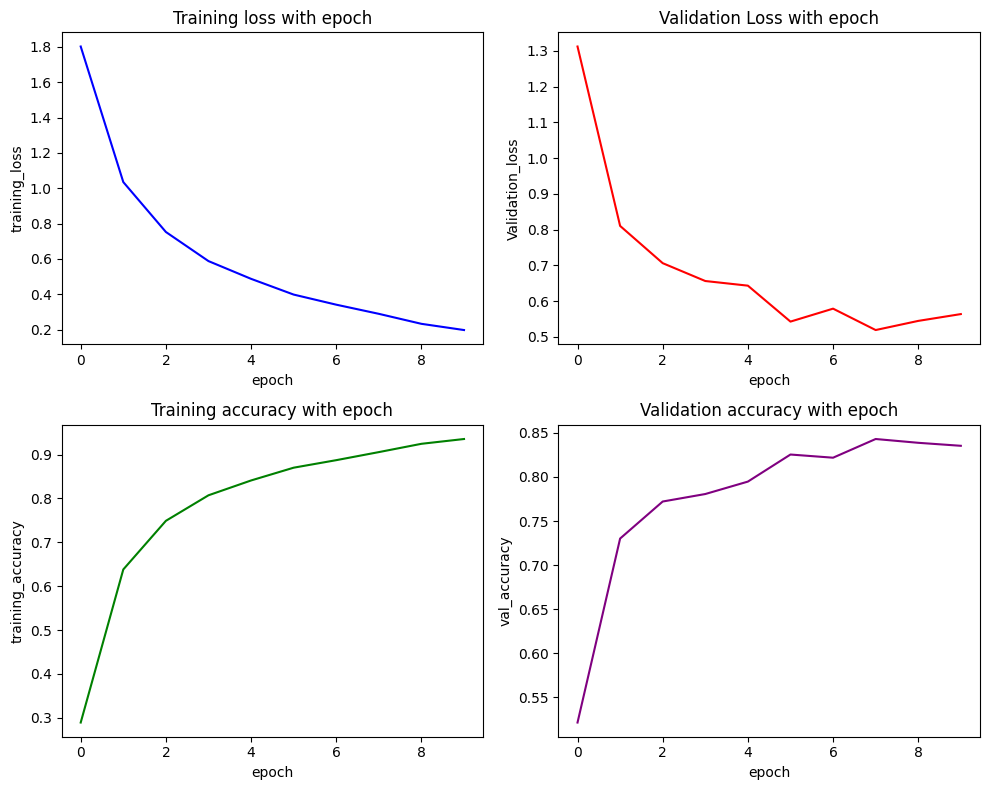

In [83]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(training_loss, color='blue')
axs[0, 0].set_title('Training loss with epoch')
axs[0, 0].set_ylabel('training_loss')
axs[0, 0].set_xlabel('epoch')

axs[0, 1].plot(val_loss, color='red')
axs[0, 1].set_title('Validation Loss with epoch')
axs[0, 1].set_ylabel('Validation_loss')
axs[0, 1].set_xlabel('epoch')

axs[1, 0].plot(training_accuracy, color='green')
axs[1, 0].set_title('Training accuracy with epoch')
axs[1, 0].set_ylabel('training_accuracy')
axs[1, 0].set_xlabel('epoch')

axs[1, 1].plot(val_accuracy, color='purple')
axs[1, 1].set_title('Validation accuracy with epoch')
axs[1, 1].set_ylabel('val_accuracy')
axs[1, 1].set_xlabel('epoch')

plt.tight_layout()

In [84]:
#Making prediction
y_pred = model.predict(train)
y_pred_val = model.predict(val)

313/313 [==============================] - 3s 9ms/step


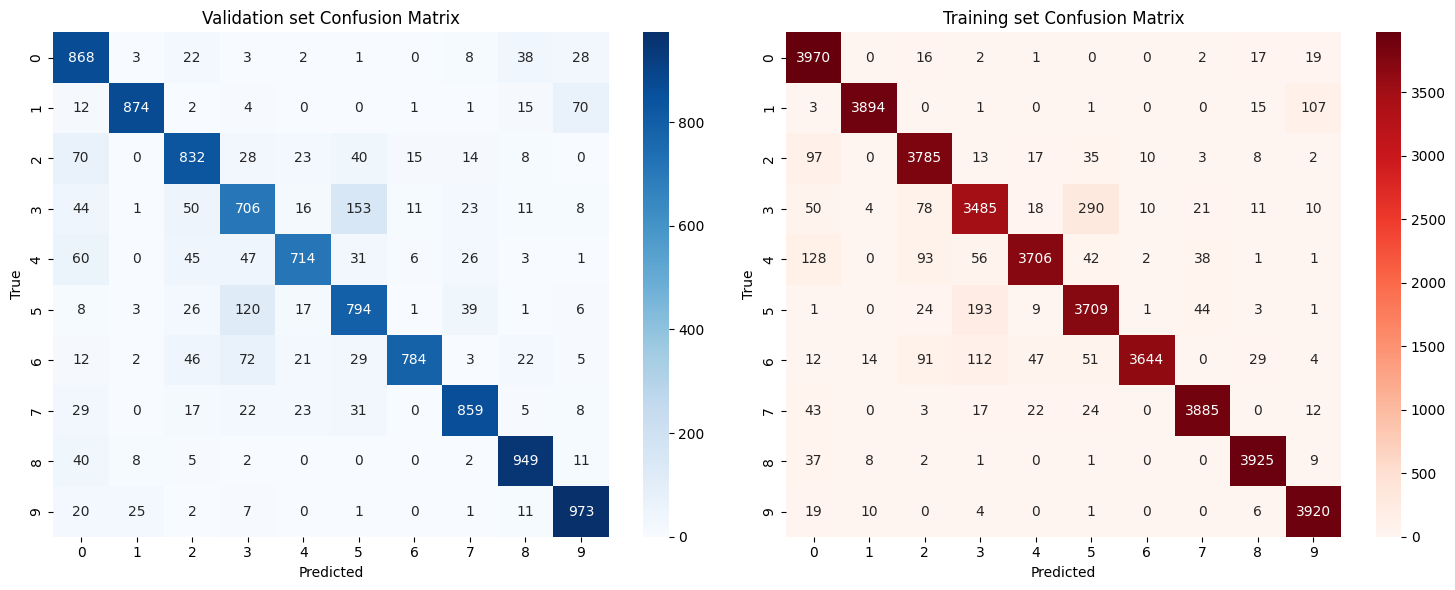

In [85]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true_binary = np.argmax(train_y, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

y_true_ = np.argmax(val_y, axis=1)
y_pred_ = np.argmax(y_pred_val, axis=1)

cm_multi = confusion_matrix(y_true_, y_pred_)
cm_binary = confusion_matrix(y_true_binary, y_pred_binary)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_), yticklabels=np.unique(y_true_), ax=axes[0])
axes[0].set_title('Validation set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_true_binary), yticklabels=np.unique(y_true_binary), ax=axes[1])
axes[1].set_title('Training set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()